---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 4

In [9]:
import networkx as nx
import pandas as pd
import numpy as np
import pickle
#import matplotlib.pyplot as plt

---

## Part 1 - Random Graph Identification

For the first part of this assignment you will analyze randomly generated graphs and determine which algorithm created them.

In [3]:
P1_Graphs = pickle.load(open('A4_graphs','rb'))
P1_Graphs

<br>
`P1_Graphs` is a list containing 5 networkx graphs. Each of these graphs were generated by one of three possible algorithms:
* Preferential Attachment (`'PA'`)
* Small World with low probability of rewiring (`'SW_L'`)
* Small World with high probability of rewiring (`'SW_H'`)

Anaylze each of the 5 graphs and determine which of the three algorithms generated the graph.

*The `graph_identification` function should return a list of length 5 where each element in the list is either `'PA'`, `'SW_L'`, or `'SW_H'`.*

0.03167539146454044
4.099161161161161


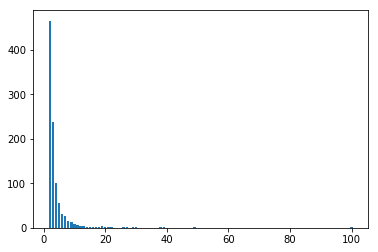

0.5642419635919628
5.089871871871872


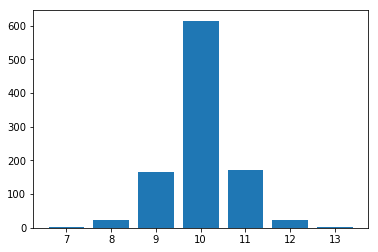

0.4018222222222227
9.378702269692925


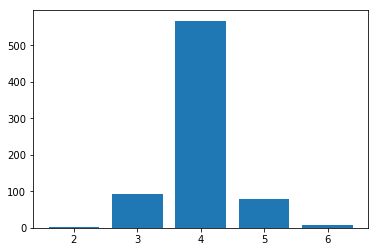

0.03780379975223251
3.1048046283934134


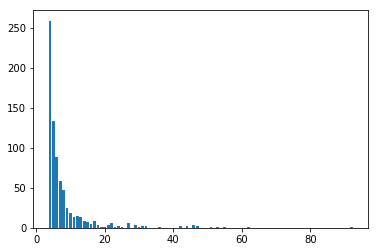

0.0033037037037037037
5.0785509568313305


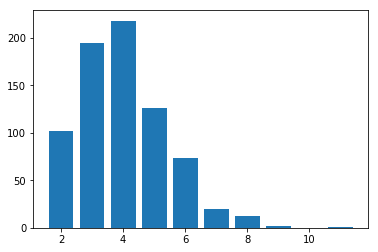

In [19]:
#for network in P1_Graphs:
#    print(nx.average_clustering(network))
#    print(nx.average_shortest_path_length(network))
#    degrees = network.degree()
#    degree_values = sorted(set(degrees.values()))
#    histogram = [list(degrees.values()).count(i) for i in degree_values]
#    plt.bar(degree_values,histogram)
#    plt.show()

In [22]:
def graph_identification():
    return ['PA', 'SW_L', 'SW_L', 'PA', 'SW_H']
graph_identification()

['PA', 'SW_L', 'SW_L', 'PA', 'SW_H']

---

## Part 2 - Company Emails

For the second part of this assignment you will be workking with a company's email network where each node corresponds to a person at the company, and each edge indicates that at least one email has been sent between two people.

The network also contains the node attributes `Department` and `ManagmentSalary`.

`Department` indicates the department in the company which the person belongs to, and `ManagmentSalary` indicates whether that person is receiving a managment position salary.

In [23]:
G = nx.read_gpickle('email_prediction.txt')

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


### Part 2A - Salary Prediction

Using network `G`, identify the people in the network with missing values for the node attribute `ManagementSalary` and predict whether or not these individuals are receiving a managment position salary.

To accomplish this, you will need to create a matrix of node features using networkx, train a sklearn classifier on nodes that have `ManagementSalary` data, and predict a probability of the node receiving a managment salary for nodes where `ManagementSalary` is missing.



Your predictions will need to be given as the probability that the corresponding employee is receiving a managment position salary.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 252 with the data being the probability of receiving managment salary, and the index being the node id.

    Example:
    
        1       1.0
        2       0.0
        5       0.8
        8       1.0
            ...
        996     0.7
        1000    0.5
        1001    0.0
        Length: 252, dtype: float64

In [27]:
G.nodes(data = True)[:5]

[(0, {'Department': 1, 'ManagementSalary': 0.0}),
 (1, {'Department': 1, 'ManagementSalary': nan}),
 (2, {'Department': 21, 'ManagementSalary': nan}),
 (3, {'Department': 21, 'ManagementSalary': 1.0}),
 (4, {'Department': 21, 'ManagementSalary': 1.0})]

In [86]:
def salary_predictions():
    df = pd.DataFrame(index = G.nodes())
    df['department'] = pd.Series([n[1]['Department'] for n in G.nodes(data = True)])
    df['ManagementSalary'] = pd.Series([n[1]['ManagementSalary'] for n in G.nodes(data = True)])
    df['clustering'] = pd.Series(nx.clustering(G))
    df['degree'] = pd.Series(G.degree())
    
    df_train = df[~pd.isnull(df['ManagementSalary'])]
    df_test = df[pd.isnull(df['ManagementSalary'])]
    
    X_train = df_train[['department', 'clustering', 'degree']]
    Y_train = df_train['ManagementSalary']
    X_test = df_test[['department', 'clustering', 'degree']]
    
    from sklearn.neural_network import MLPClassifier
    clf = MLPClassifier(hidden_layer_sizes = [10, 5], alpha = 5, random_state = 0, solver='lbfgs', verbose=0)
    clf.fit(X_train, Y_train)
    test_proba = clf.predict_proba(X_test)[:, 1]
    return pd.Series(test_proba, X_test.index)
salary_predictions()

1       0.114948
2       0.695689
5       0.821757
8       0.144553
14      0.312843
18      0.130644
27      0.327022
30      0.358453
31      0.256401
34      0.124140
37      0.177125
40      0.309063
45      0.202567
54      0.215430
55      0.178856
60      0.231464
62      0.821757
65      0.385604
77      0.060305
79      0.116141
97      0.093802
101     0.111417
103     0.217186
108     0.186941
113     0.466223
122     0.041731
141     0.503505
142     0.821757
144     0.051408
145     0.354858
          ...   
913     0.077132
914     0.086301
915     0.027025
918     0.089525
923     0.037456
926     0.057301
931     0.062429
934     0.029197
939     0.028472
944     0.025594
945     0.035537
947     0.044962
950     0.171127
951     0.047267
953     0.060779
959     0.023387
962     0.028757
963     0.169461
968     0.033695
969     0.030315
974     0.033398
984     0.027688
987     0.048889
989     0.034602
991     0.031212
992     0.024831
994     0.025828
996     0.0266

### Part 2B - New Connections Prediction

For the last part of this assignment, you will predict future connections between employees of the network. The future connections information has been loaded into the variable `future_connections`. The index is a tuple indicating a pair of nodes that currently do not have a connection, and the `Future Connection` column indicates if an edge between those two nodes will exist in the future, where a value of 1.0 indicates a future connection.

In [57]:
future_connections = pd.read_csv('Future_Connections.csv', index_col=0, converters={0: eval})
future_connections.head(10)

,Future Connection
"(6, 840)",0.0
"(4, 197)",0.0
"(620, 979)",0.0
"(519, 872)",0.0
"(382, 423)",0.0
"(97, 226)",1.0
"(349, 905)",0.0
"(429, 860)",0.0
"(309, 989)",0.0
"(468, 880)",0.0


Using network `G` and `future_connections`, identify the edges in `future_connections` with missing values and predict whether or not these edges will have a future connection.

To accomplish this, you will need to create a matrix of features for the edges found in `future_connections` using networkx, train a sklearn classifier on those edges in `future_connections` that have `Future Connection` data, and predict a probability of the edge being a future connection for those edges in `future_connections` where `Future Connection` is missing.



Your predictions will need to be given as the probability of the corresponding edge being a future connection.

The evaluation metric for this assignment is the Area Under the ROC Curve (AUC).

Your grade will be based on the AUC score computed for your classifier. A model which with an AUC of 0.88 or higher will receive full points, and with an AUC of 0.82 or higher will pass (get 80% of the full points).

Using your trained classifier, return a series of length 122112 with the data being the probability of the edge being a future connection, and the index being the edge as represented by a tuple of nodes.

    Example:
    
        (107, 348)    0.35
        (542, 751)    0.40
        (20, 426)     0.55
        (50, 989)     0.35
                  ...
        (939, 940)    0.15
        (555, 905)    0.35
        (75, 101)     0.65
        Length: 122112, dtype: float64

In [94]:
def new_connections_predictions():
    preferential_attachment = list(nx.preferential_attachment(G))
    df = pd.DataFrame(index=[(x[0], x[1]) for x in preferential_attachment])
    df['preferential_attachment'] = [x[2] for x in preferential_attachment]
    df['resource_allocation_index'] = [x[2] for x in list(nx.resource_allocation_index(G))]
    df['jaccard_coefficient'] = [x[2] for x in list(nx.jaccard_coefficient(G))]
    df = future_connections.join(df, how='outer')
    
    df_train = df[~pd.isnull(df['Future Connection'])]
    df_test = df[pd.isnull(df['Future Connection'])]
    
    X_train = df_train[['preferential_attachment', 'resource_allocation_index', 'jaccard_coefficient']]
    Y_train = df_train['Future Connection']
    X_test = df_test[['preferential_attachment', 'resource_allocation_index', 'jaccard_coefficient']]
    
    from sklearn.neural_network import MLPClassifier
    
    clf = MLPClassifier()
    clf.fit(X_train, Y_train)
    test_proba = clf.predict_proba(X_test)[:, 1]
    predictions = pd.Series(test_proba, X_test.index)
    target = future_connections[pd.isnull(future_connections['Future Connection'])]
    target['prob'] = [predictions[x] for x in target.index]
    return target['prob']
new_connections_predictions()

/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(107, 348)    0.080081
(542, 751)    0.080081
(20, 426)     0.080081
(50, 989)     0.080081
(942, 986)    0.080081
(324, 857)    0.080081
(13, 710)     0.080081
(19, 271)     0.080081
(319, 878)    0.080081
(659, 707)    0.080081
(49, 843)     0.080081
(208, 893)    0.080081
(377, 469)    0.080081
(405, 999)    0.080081
(129, 740)    0.080081
(292, 618)    0.080081
(239, 689)    0.080081
(359, 373)    0.080081
(53, 523)     0.080081
(276, 984)    0.080081
(202, 997)    0.080081
(604, 619)    0.080081
(270, 911)    0.080081
(261, 481)    0.080081
(200, 450)    0.080081
(213, 634)    0.080081
(644, 735)    0.080081
(346, 553)    0.080081
(521, 738)    0.080081
(422, 953)    0.080081
                ...   
(672, 848)    0.080081
(28, 127)     0.080081
(202, 661)    0.080081
(54, 195)     0.080081
(295, 864)    0.080081
(814, 936)    0.080081
(839, 874)    0.080081
(139, 843)    0.080081
(461, 544)    0.080081
(68, 487)     0.080081
(622, 932)    0.080081
(504, 936)    0.080081
(479, 528) 